# Predicting the onset of Diabetes 

In [1]:
# Standard Libraries
import os 
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

# Specific Libraries
import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing 
from sklearn import tree, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from io import StringIO  
import pydotplus
from IPython.display import Image 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
diabetes = pd.read_csv("/content/sample_data/diabetes.csv")

# Exploring The Data

In [4]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes.shape

(768, 9)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.describe(include = 'all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Cleaning and Transforming the Data

In [8]:
diabetes['Outcome'].unique()

array([1, 0])

We will replace 1 and 0 in the Outcome column with YES and NO respectively

In [9]:
diabetes['Outcome'] = diabetes['Outcome'].replace(1, 'YES')
diabetes['Outcome'] = diabetes['Outcome'].replace(0, 'NO')
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [10]:
diabetes['Outcome'].unique()

array(['YES', 'NO'], dtype=object)

As we see here, there are no NULL values which means we don't need to use dropna()

# Data Visualization

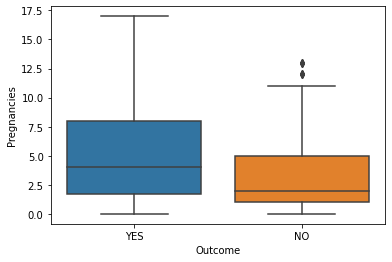

In [11]:
sns.boxplot(y = 'Pregnancies', x = 'Outcome', data = diabetes)
plt.show()

The boxplots are positively skewed so the median would be closer to the bottom quartile. Pregnancies don't seem to make much of a difference in whether a person will contract diabetes so its a weak relationship at best.

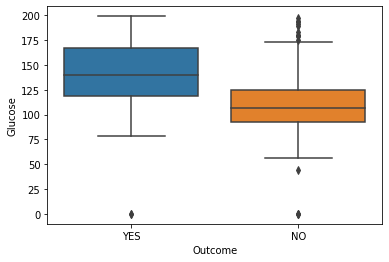

In [12]:
sns.boxplot(y = 'Glucose', x = 'Outcome', data = diabetes)
plt.show()

The boxplot for the YES value of Outcome is skewed negatively showing its median closer to the top quartile. The boxplot for the NO value of Outcome seems to skew normal.People who contracted diabetes likely had higher glucose levels.

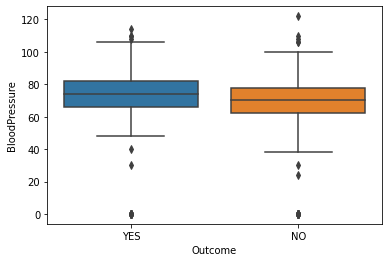

In [13]:
sns.boxplot(y = 'BloodPressure', x = 'Outcome', data = diabetes)

The boxplots for YES and NO are skewed normal.The bloodPressure levels were roughly the same on average showing that BloodPressure does not seem to make much of a difference in whether a person contracts diabetes.

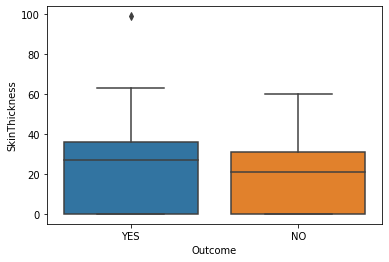

In [14]:
sns.boxplot(y = 'SkinThickness', x = 'Outcome', data = diabetes)

The boxplots for each value is skewed negatively while at the same time showing there is a weak relationship between Skin Thickness and the likelihood of contracting diabetes.

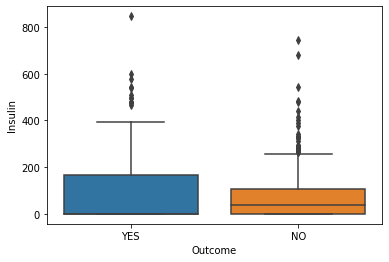

In [15]:
sns.boxplot(y = 'Insulin', x = 'Outcome', data = diabetes)

The boxplot for the YES value skews negative heavily showing a strong relationship between Insulin and the likelihood of contracting diabetes. The boxplot for the NO value shows the average close to the bottom quartile although there were frequent outliers skewed negatively. 

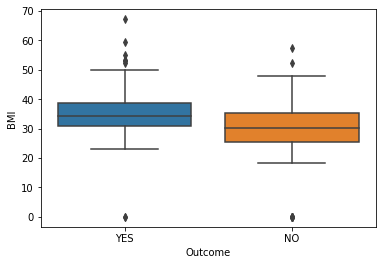

In [16]:
sns.boxplot(y = 'BMI', x = 'Outcome', data = diabetes)

The BMI for people who contracted diabetes was slightly higher on average than the people who did not contract diabetes. 

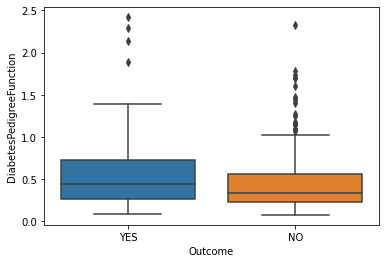

In [17]:
sns.boxplot(y = 'DiabetesPedigreeFunction', x = 'Outcome', data = diabetes)

The DiabetesPedigreeFunction is correlated with the likelihood of contracting diabetes although very weak.

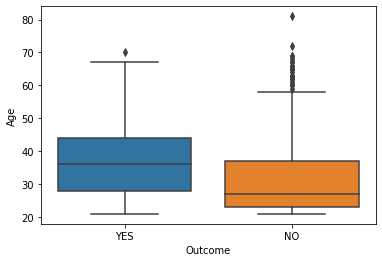

In [18]:
sns.boxplot(y = 'Age', x = 'Outcome', data = diabetes)

The boxplot for YES is skewed negatively showing the likelihood of contracting diabetes is among older groups. The boxplot for NO is skewed positively showing the likelihood of avoiding is among younger groups.

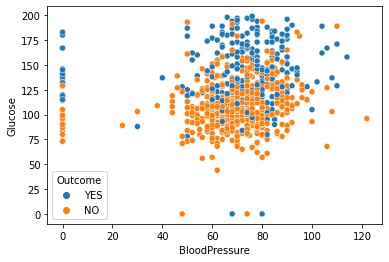

In [19]:
sns.scatterplot(y='Glucose', x= 'BloodPressure', hue = 'Outcome', data =diabetes)

Although not a strong relationship, there seems to be a direct proportionality with glucose and blood pressure.

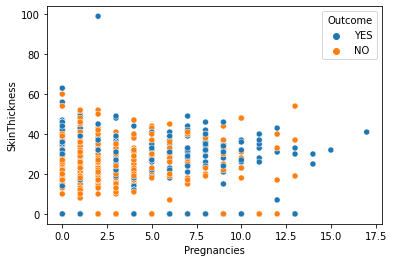

In [20]:
sns.scatterplot(y='SkinThickness', x= 'Pregnancies', hue = 'Outcome', data =diabetes)

There is no relationship between Pregnancies and SkinThickness.

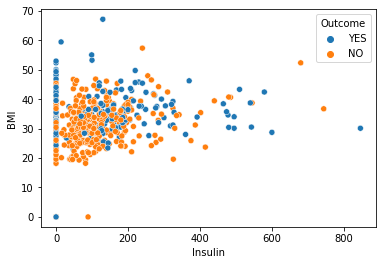

In [21]:
sns.scatterplot(y='BMI', x= 'Insulin', hue = 'Outcome', data =diabetes)

There seems to be no relationship between Insulin and BMI.

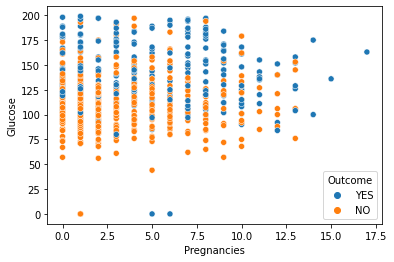

In [22]:
sns.scatterplot(y='Glucose', x= 'Pregnancies', hue = 'Outcome', data =diabetes)

There seems to be no relationship between Pregnancies and Glucose.

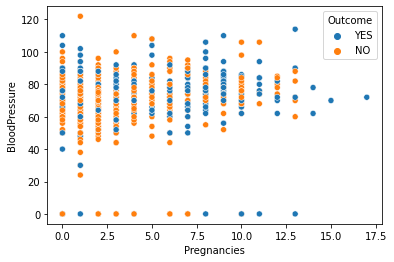

In [23]:
sns.scatterplot(y='BloodPressure', x= 'Pregnancies', hue = 'Outcome', data =diabetes)

There seems to be no relationship between Pregnancies and Blood Pressure.

# Train/Test Split  

In [24]:
# List of all the column variables except 'Outcome'
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

# explanatory variable
X = diabetes[features]

# dependent variable 
y = diabetes.Outcome

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 246)

In [26]:
entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state = 1234)

In [27]:
entr_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [28]:
y_pred = entr_model.predict(X_test)

In [29]:
y_pred

array(['YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO', 'YES',
       'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO',
       'YES', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES',
       'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO',
       'NO', 'NO', 'YES', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'YES', 'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'YES', 'YES',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'NO', 'YES', 'YES',
       'NO', 'NO', 'NO', 'YES', 'YES', 'NO', 'YES', 'NO', 'NO', 'NO',
       'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'YES', 'YES', 'YES', 'NO',
       'YES', 'NO', 'NO', 'YES', 'YES', 'NO', 'NO', 'NO', 'NO', 'YES',
       'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'NO', 'YES', 'NO', 'NO',
       'YES', 'YES', 'NO', 'YES', 'NO', 'YES', 'NO', 'YES', 'Y

In [30]:
y_pred = pd.Series(y_pred)

In [31]:
y_pred

0      YES
1       NO
2      YES
3       NO
4      YES
      ... 
187    YES
188     NO
189     NO
190    YES
191     NO
Length: 192, dtype: object

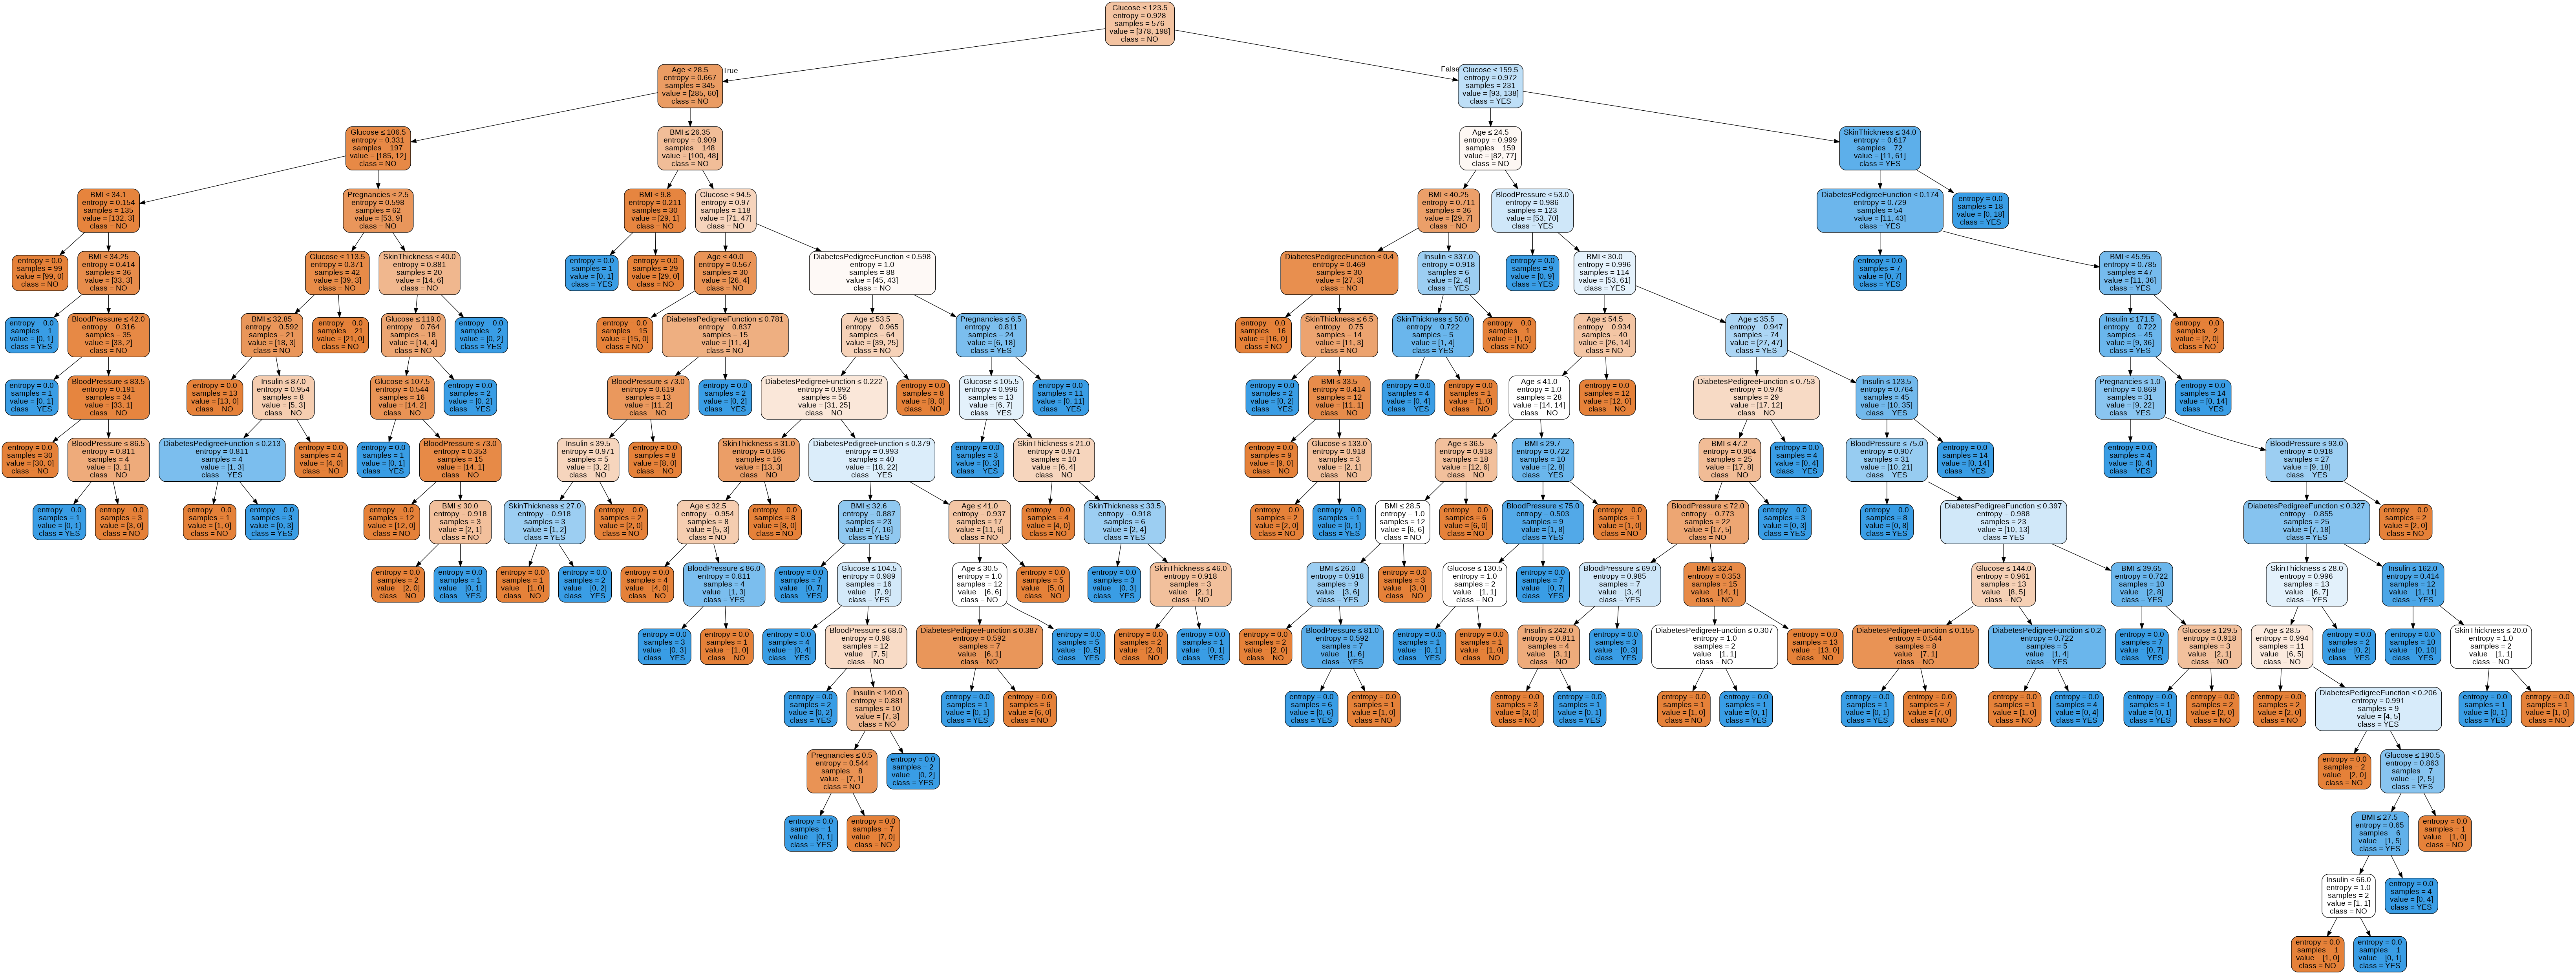

In [32]:
dot_data = StringIO()

tree.export_graphviz(entr_model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = X_train.columns, class_names = ['NO','YES'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [33]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.6979166666666666
Balanced accuracy: 0.692271662763466
Precision score 0.573170731707317
Recall score 0.7131147540983607


# Evaluating and Concluding

In [34]:
diabetes['Outcome'].value_counts()

NO     500
YES    268
Name: Outcome, dtype: int64

268 out of 768 patients contracted diabetes which is about 35%. 


# Modeling

In [35]:
firstRFModel = RandomForestClassifier(max_depth= 3, random_state= 1234)
firstRFModel.fit(X_train, y_train)

y_pred = firstRFModel.predict(X_test)
y_pred = pd.Series(y_pred)
firstRFModel

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [36]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(diabetes[['BloodPressure','Glucose']].values, 
                                              (diabetes.Outcome == 'YES').values,random_state=5)

In [37]:
clf = LogisticRegression()
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.78125


In [38]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(diabetes[['Pregnancies','BloodPressure','Glucose']].values, 
                                              (diabetes.Outcome == 'YES').values,random_state=5)

In [39]:
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.7708333333333334


In [40]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(diabetes[['Insulin','BloodPressure','Glucose', 'BMI']].values, 
                                              (diabetes.Outcome == 'YES').values,random_state=5)

In [41]:
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.796875


In [42]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(diabetes[['Insulin','BloodPressure','Glucose', 'BMI', 'SkinThickness']].values, 
                                              (diabetes.Outcome == 'YES').values,random_state=5)

In [43]:
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.7864583333333334


In [44]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(diabetes[['Insulin','BloodPressure','Glucose', 'BMI', 'SkinThickness', 'DiabetesPedigreeFunction']].values, 
                                              (diabetes.Outcome == 'YES').values,random_state=5)

In [45]:
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.7864583333333334


In [46]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(diabetes[['Pregnancies','SkinThickness','BloodPressure','Glucose', 'Insulin','BMI','DiabetesPedigreeFunction']].values, 
                                              (diabetes.Outcome == 'YES').values,random_state=5)

In [47]:
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.7916666666666666


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [48]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(diabetes[['Pregnancies','SkinThickness','BMI','DiabetesPedigreeFunction']].values, 
                                              (diabetes.Outcome == 'YES').values,random_state=5)

In [49]:
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.6770833333333334


In [50]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(diabetes[['Pregnancies','BMI','BloodPressure','Glucose']].values, 
                                              (diabetes.Outcome == 'YES').values,random_state=5)
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.7864583333333334
